<a href="https://colab.research.google.com/github/ZiadSakr5/ZezoSakr/blob/main/Copy_of_Yet_another_copy_of_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****

**NOTE : Could not train most of baseline models or fine-tuned it , because either it takes hours or it crashes my colab session**

In [1]:
%pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)


{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

### Mushroom Dataset Description

**Target Variable (Binary Class):**  
- `edible = e`  
- `poisonous = p` (also includes mushrooms of unknown edibility)  

---

### Features (20 variables: nominal = n, metrical = m)

1. **cap-diameter (m):** float number in cm  
2. **cap-shape (n):**  
   - bell = b  
   - conical = c  
   - convex = x  
   - flat = f  
   - sunken = s  
   - spherical = p  
   - others = o  
3. **cap-surface (n):**  
   - fibrous = i  
   - grooves = g  
   - scaly = y  
   - smooth = s  
   - shiny = h  
   - leathery = l  
   - silky = k  
   - sticky = t  
   - wrinkled = w  
   - fleshy = e  
4. **cap-color (n):**  
   - brown = n  
   - buff = b  
   - gray = g  
   - green = r  
   - pink = p  
   - purple = u  
   - red = e  
   - white = w  
   - yellow = y  
   - blue = l  
   - orange = o  
   - black = k  
5. **does-bruise-bleed (n):**  
   - bruises-or-bleeding = t  
   - no = f  
6. **gill-attachment (n):**  
   - adnate = a  
   - adnexed = x  
   - decurrent = d  
   - free = e  
   - sinuate = s  
   - pores = p  
   - none = f  
   - unknown = ?  
7. **gill-spacing (n):**  
   - close = c  
   - distant = d  
   - none = f  
8. **gill-color (n):** see `cap-color` + none = f  
9. **stem-height (m):** float number in cm  
10. **stem-width (m):** float number in mm  
11. **stem-root (n):**  
    - bulbous = b  
    - swollen = s  
    - club = c  
    - cup = u  
    - equal = e  
    - rhizomorphs = z  
    - rooted = r  
12. **stem-surface (n):** see `cap-surface` + none = f  
13. **stem-color (n):** see `cap-color` + none = f  
14. **veil-type (n):**  
    - partial = p  
    - universal = u  
15. **veil-color (n):** see `cap-color` + none = f  
16. **has-ring (n):**  
    - ring = t  
    - none = f  
17. **ring-type (n):**  
    - cobwebby = c  
    - evanescent = e  
    - flaring = r  
    - grooved = g  
    - large = l  
    - pendant = p  
    - sheathing = s  
    - zone = z  
    - scaly = y  
    - movable = m  
    - none = f  
    - unknown = ?  
18. **spore-print-color (n):** see `cap-color`  
19. **habitat (n):**  
    - grasses = g  
    - leaves = l  
    - meadows = m  
    - paths = p  
    - heaths = h  
    - urban = u  
    - waste = w  
    - woods = d  
20. **season (n):**  
    - spring = s  
    - summer = u  
    - autumn = a  
    - winter = w  

---

### Class Labels
- **edible = e**  
- **poisonous = p**  


In [3]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [4]:
y

,class
0,p
1,p
2,p
3,p
4,p
...,...
61064,p
61065,p
61066,p
61067,p


## Mushroom Classification Project

### Problem Description
The goal of this project is to classify mushrooms as **edible (e)** or **poisonous (p)** based on 20 descriptive features such as cap shape, cap color, stem characteristics, habitat, and season.  
This is a **binary classification problem** where the target variable is the mushroom class (`edible` or `poisonous`).  

---

### Project Workflow

#### 1. Exploratory Data Analysis (EDA)
- Inspect the dataset structure (rows, columns, data types).  
- Check for missing values and duplicates.  
- Visualize distributions of categorical features (bar plots) and numeric features (histograms, boxplots).  
- Explore correlations between features and the target class.  
- Look for class imbalance in the target variable (edible vs poisonous).  

#### 2. Data Cleaning & Preprocessing
- Handle missing values or unknown entries if present.  
- Encode categorical features (e.g., **One-Hot Encoding** or **Label Encoding**).  
- Scale numerical features (e.g., **StandardScaler** or **MinMaxScaler**).  
- Stratify the dataset when splitting into **training and test sets** to maintain class balance.  
- If class imbalance is significant, apply oversampling techniques (e.g., **SMOTE**).  

#### 3. Feature Selection
To reduce dimensionality and improve generalization, apply feature selection techniques such as:  
- **Filter Methods:** Use statistical tests (e.g., Chi-square, ANOVA F-test, mutual information) to rank features.  
- **Wrapper Methods:** Apply Recursive Feature Elimination (**RFE**) with models like Logistic Regression or Decision Trees.  
- **Embedded Methods:** Leverage feature importance from models (e.g., Decision Tree, Random Forest, Lasso Regression).  
- Compare model performance before and after feature selection to evaluate impact.  

#### 4. Model Training & Evaluation
Train and evaluate the following classification models:  
- **Logistic Regression**  
- **Decision Tree**  
- **Random Forest**  
- **Support Vector Machine (SVM)**  
- **K-Nearest Neighbors (KNN)**  
- **Naive Bayes**  

For each model:  
- Train on the **training set**.  
- Evaluate on the **test set** using:  
  - **Classification Report** (Precision, Recall, F1-score, Accuracy)  
  - **Confusion Matrix**  
  - **Cross-validation (optional)** for stability check  

#### 5. Hyperparameter Tuning
To improve model performance, apply hyperparameter optimization techniques:  
- **Grid Search:** Exhaustively search all combinations of parameters (good for small parameter spaces).  
- **Random Search:** Randomly sample parameter combinations (more efficient for large parameter spaces).  
- **Bayesian Optimization:** Iteratively choose hyperparameters based on past performance (efficient for complex models like Random Forest, SVM, or KNN).  

Compare tuned models with baseline models to measure improvement.  

#### 6. Feature Importance
- Extract **feature importance** from Decision Tree and Random Forest models.  
- Rank features to identify the most influential ones for classification.  
- Use feature importance as a basis for feature selection and model simplification.  

#### 7. Model Comparison
- Compare performance across all models (baseline, tuned, and with feature selection).  
- Use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to decide the best-performing model.
- Create plot of ROC-AUC curve of each model with different color for comparison  
- Summarize results in a **comparison table** or **bar plot**.  

---

#### 8. Save best models as pickle files

---

### Final Deliverables
- Preprocessed dataset ready for classification.  
- Performance evaluation of six classification models.  
- Insights on class imbalance and handling techniques.  
- Feature selection results (filter, wrapper, and embedded methods).  
- Hyperparameter tuning results from Grid Search, Random Search, and Bayesian Optimization.  
- Feature importance ranking for better model interpretability.  
- Final comparison and recommendation of the best-performing model for mushroom classification.  
- pickle files of the saved models


**NOTE : Could not train most of baseline models or fine-tuned it , because either it takes hours or it crashes my colab session**

In [5]:
X.shape

(61069, 20)

In [6]:
y.shape

(61069, 1)

In [7]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [9]:
X.describe(include='all')

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069.000000,61069,46949,61069,61069,51185,36006,61069,61069.000000,61069.000000,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,NaN,7,11,12,2,7,3,12,NaN,NaN,5,8,13,1,6,2,8,7,8,4
top,NaN,x,t,n,f,a,c,w,NaN,NaN,s,s,w,u,w,f,f,k,d,a
freq,NaN,26934,8196,24218,50479,12698,24710,18521,NaN,NaN,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177
mean,6.733854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.581538,12.149410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.264845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.370017,10.035955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.640000,5.210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.950000,10.190000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.740000,16.570000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
y.value_counts(normalize=True)

,proportion
class,
p,0.554913
e,0.445087


In [11]:
X.isnull().sum(), X.duplicated().sum()

(cap-diameter                0
 cap-shape                   0
 cap-surface             14120
 cap-color                   0
 does-bruise-or-bleed        0
 gill-attachment          9884
 gill-spacing            25063
 gill-color                  0
 stem-height                 0
 stem-width                  0
 stem-root               51538
 stem-surface            38124
 stem-color                  0
 veil-type               57892
 veil-color              53656
 has-ring                    0
 ring-type                2471
 spore-print-color       54715
 habitat                     0
 season                      0
 dtype: int64,
 np.int64(146))

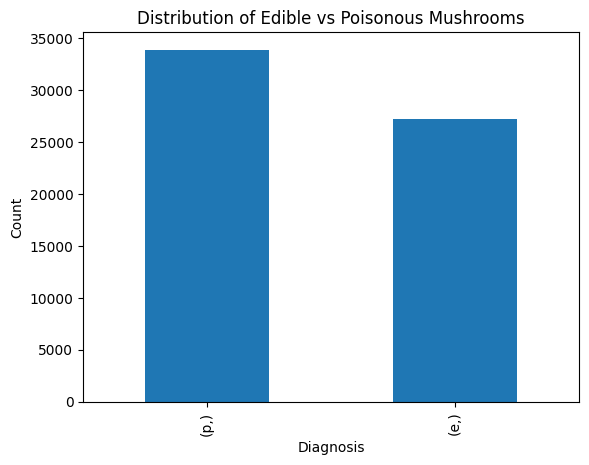

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

y.value_counts().plot(kind="bar")
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

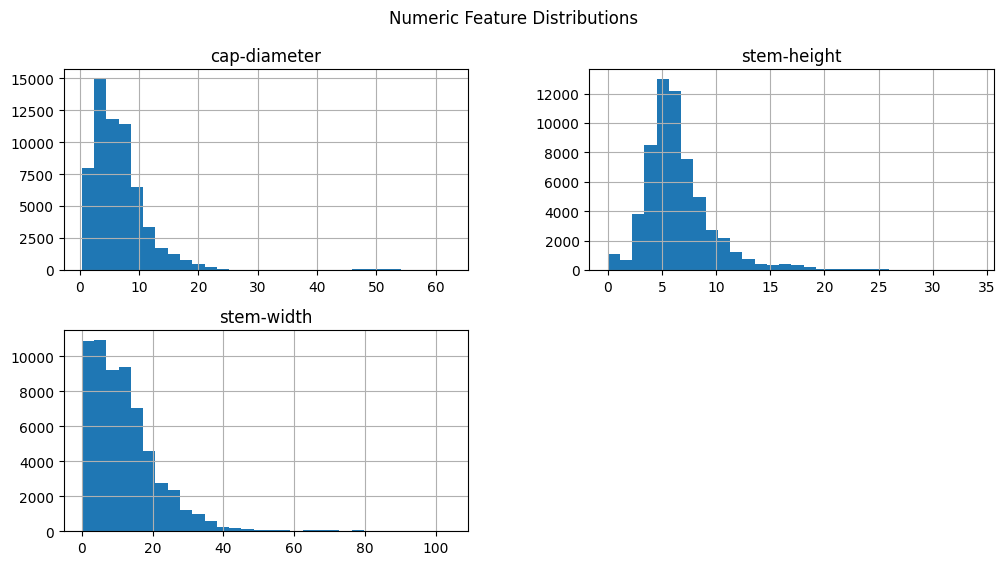

In [13]:
numeric_features = X.select_dtypes(include=['float64']).columns
X[numeric_features].hist(bins=30, figsize=(12,6))
plt.suptitle("Numeric Feature Distributions")
plt.show()

In [14]:
import numpy as np
X.replace("?", np.nan, inplace=True)

/tmp/ipython-input-4030611846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace("?", np.nan, inplace=True)


In [15]:
X = X.fillna(method="ffill")

/tmp/ipython-input-656806923.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")


In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['float64']).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_encoded = encoder.fit_transform(X)

print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)

Shape before encoding: (61069, 20)
Shape after encoding: (61069, 9545)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
import pandas as pd

In [ ]:
# can't run , crashed colab
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


In [21]:
from sklearn.feature_selection import SelectKBest, chi2
chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_encoded, y)

chi2_features = chi2_selector.get_support(indices=True)
print("Top 10 features selected by Chi-Square Test:")
print(chi2_features)

Top 10 features selected by Chi-Square Test:
[2571 2582 2583 2607 9506 9511 9512 9521 9524 9530]


In [ ]:
# can't run , crashed colab
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)

rfe_selector = RFE(log_reg, n_features_to_select=10)
rfe_selector.fit(X_encoded, y)
rfe_features = rfe_selector.get_support(indices=True)

print(rfe_features)


In [ ]:
# can't run , crashed colab
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_encoded, y)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]

print(indices)


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Logistic Regression Results:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8515

Classification Report:
               precision    recall  f1-score   support

           e       0.84      0.83      0.83      5436
           p       0.86      0.87      0.87      6778

    accuracy                           0.85     12214
   macro avg       0.85      0.85      0.85     12214
weighted avg       0.85      0.85      0.85     12214



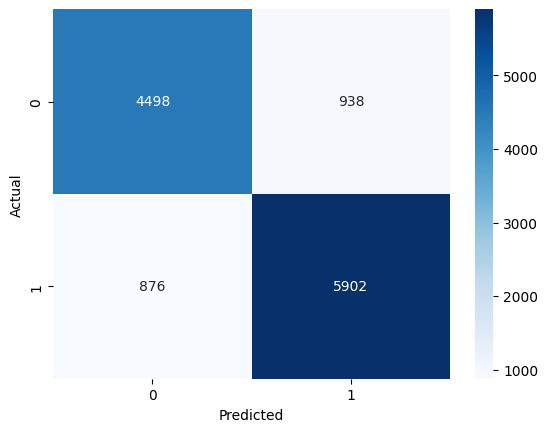

In [ ]:
print("Logistic Regression Results:")
lr = LogisticRegression(max_iter=500)
evaluate_model(lr, X_train, y_train, X_test, y_test)



Decision Tree Results:
Accuracy: 0.9955

Classification Report:
               precision    recall  f1-score   support

           e       1.00      0.99      0.99      5436
           p       0.99      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



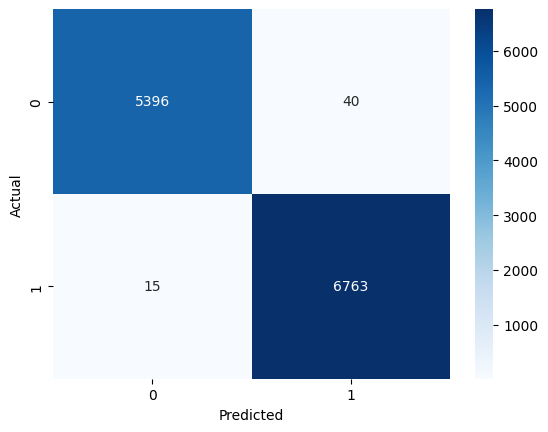

In [ ]:
print("Decision Tree Results:")
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train, y_train, X_test, y_test)


Random Forest Results:


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9964

Classification Report:
               precision    recall  f1-score   support

           e       1.00      0.99      1.00      5436
           p       0.99      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



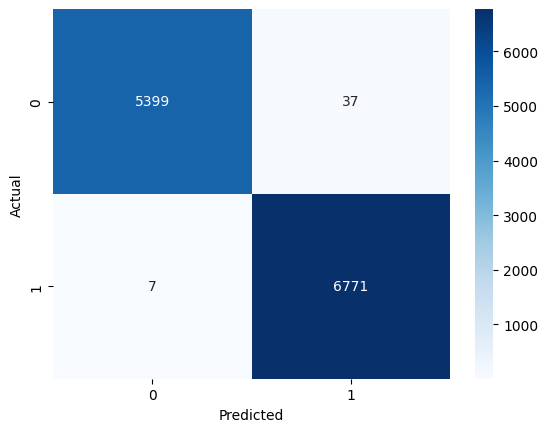

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("Random Forest Results:")
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test)


In [ ]:
# can't run , crashed colab
from sklearn.svm import SVC

print("SVM Results:")
svm = SVC()
evaluate_model(svm, X_train, y_train, X_test, y_test)



SVM Results:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# can't run , crashed colab
from sklearn.neighbors import KNeighborsClassifier

print("KNN Results:")
knn = KNeighborsClassifier()
evaluate_model(knn, X_train, y_train, X_test, y_test)


KNN Results:


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# can't run , crashed colab
from sklearn.naive_bayes import GaussianNB

print("Naive Bayes Results:")
nb = GaussianNB()
evaluate_model(nb, X_train, y_train, X_test, y_test)


In [ ]:
# can't run , crashed colab
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid_dt = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid_dt,
                       cv=5,
                       scoring="accuracy",
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)
print("Best Parameters (Decision Tree):", grid_dt.best_params_)
print("Best Accuracy:", grid_dt.best_score_)


In [ ]:
param_dist_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
rand_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                             param_distributions=param_dist_rf,
                             n_iter=10,
                             cv=5,
                             scoring="accuracy",
                             n_jobs=-1,
                             random_state=42)

rand_rf.fit(X_train, y_train)
print("Best Parameters (Random Forest):", rand_rf.best_params_)
print("Best Accuracy:", rand_rf.best_score_)


In [ ]:
param_grid_svm = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"]
}
grid_svm = GridSearchCV(SVC(),
                        param_grid_svm,
                        cv=5,
                        scoring="accuracy",
                        n_jobs=-1)

grid_svm.fit(X_train, y_train)
print("Best Parameters (SVM):", grid_svm.best_params_)
print("Best Accuracy:", grid_svm.best_score_)


In [ ]:
import pandas as pd

dt.fit(X_train, y_train)
dt_importances = pd.Series(dt.feature_importances_, index=X.columns)
dt_importances = dt_importances.sort_values(ascending=False)

dt_importances.head(10).plot(kind="bar", title="Top 10 Features - Decision Tree")
plt.show()

In [ ]:
rf.fit(X_train, y_train)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_importances = rf_importances.sort_values(ascending=False)

rf_importances.head(10).plot(kind="bar", title="Top 10 Features - Random Forest")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

results = {}

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "KNN": knn,
    "Naive Bayes": nb
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["precision"]
    recall = classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["recall"]
    f1 = classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_score)

    results[name] = [acc, precision, recall, f1, roc_auc]


In [ ]:
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]).T
results_df


In [ ]:
results_df[["Accuracy", "F1-score", "ROC-AUC"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

In [ ]:
import pickle

for name, model in models.items():
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, "wb") as file:
        pickle.dump(model, file)

print("All models saved as pickle files.")
